In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

In [29]:

ADA = pd.read_csv('BTC.csv')

In [30]:
ADA.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [31]:
ADA['ADA MA5'] = ADA['close'].rolling(window=5).mean()
ADA['ADA MA10'] = ADA['close'].rolling(window=10).mean()
ADA['ADA MA20'] = ADA['close'].rolling(window=20).mean()
ADA = ADA.dropna()

In [32]:
ADA.head()

,ticker,date,open,high,low,close,ADA MA5,ADA MA10,ADA MA20
19,BTC,2010-08-05,0.0570,0.0610,0.0570,0.0610,0.05982,0.061845,0.063135
20,BTC,2010-08-06,0.0610,0.0624,0.0607,0.0623,0.06006,0.062075,0.063775
21,BTC,2010-08-07,0.0623,0.0623,0.0590,0.0590,0.05986,0.062085,0.062433
22,BTC,2010-08-08,0.0590,0.0610,0.0590,0.0609,0.06004,0.061185,0.061438
23,BTC,2010-08-09,0.0609,0.0735,0.0593,0.0710,0.06284,0.062015,0.061251


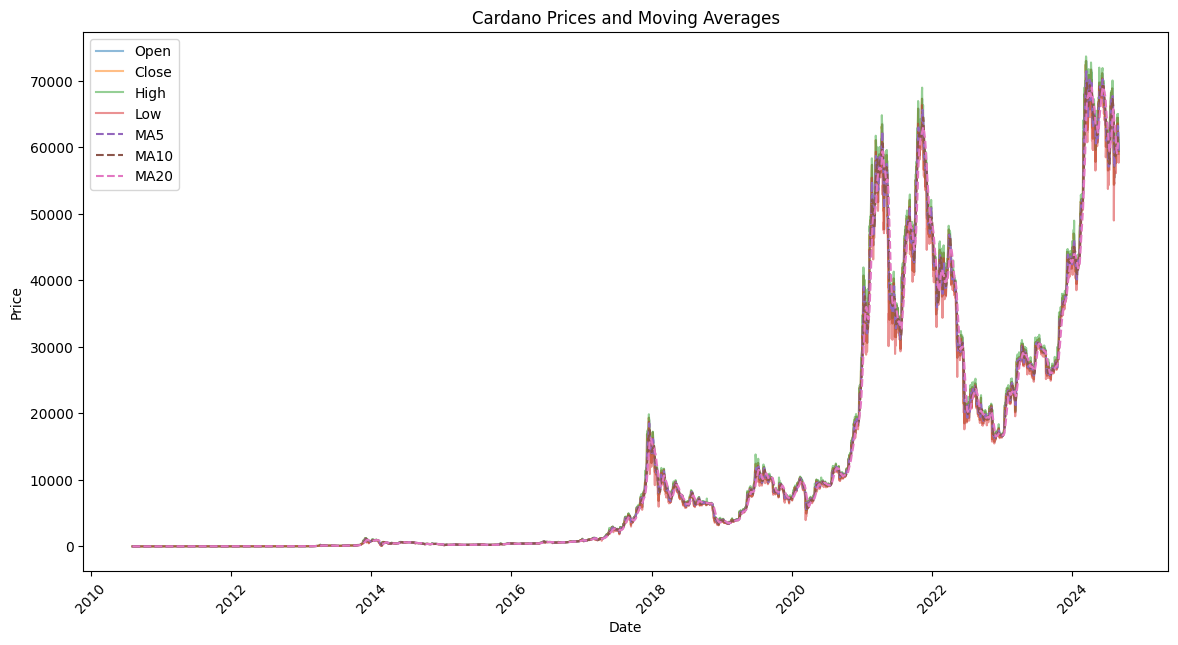

In [33]:
# Parse the Date column to datetime
ADA['date'] = pd.to_datetime(ADA['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(ADA['date'], ADA['open'], label='Open', alpha=0.5)
plt.plot(ADA['date'], ADA['close'], label='Close', alpha=0.5)
plt.plot(ADA['date'], ADA['high'], label='High', alpha=0.5)
plt.plot(ADA['date'], ADA['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(ADA['date'], ADA['ADA MA5'], label='MA5', linestyle='--')
plt.plot(ADA['date'], ADA['ADA MA10'], label='MA10', linestyle='--')
plt.plot(ADA['date'], ADA['ADA MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Cardano Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [34]:
# Create the target variable (next day's closing price)
ADA['Next_Close'] = ADA['close'].shift(-1)
ADA = ADA.dropna()

In [35]:
ADA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5140 entries, 19 to 5158
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ticker      5140 non-null   object        
 1   date        5140 non-null   datetime64[ns]
 2   open        5140 non-null   float64       
 3   high        5140 non-null   float64       
 4   low         5140 non-null   float64       
 5   close       5140 non-null   float64       
 6   ADA MA5     5140 non-null   float64       
 7   ADA MA10    5140 non-null   float64       
 8   ADA MA20    5140 non-null   float64       
 9   Next_Close  5140 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 441.7+ KB


In [36]:
ADA_features = ADA[['open', 'low', 'high', 'close', 'ADA MA5', 'ADA MA10', 'ADA MA20']]
ADA_target = ADA['Next_Close']

In [37]:
ADA_features

,open,low,high,close,ADA MA5,ADA MA10,ADA MA20
19,0.0570,0.0570,0.0610,0.0610,0.05982,0.061845,0.063135
20,0.0610,0.0607,0.0624,0.0623,0.06006,0.062075,0.063775
21,0.0623,0.0590,0.0623,0.0590,0.05986,0.062085,0.062433
22,0.0590,0.0590,0.0610,0.0609,0.06004,0.061185,0.061438
23,0.0609,0.0593,0.0735,0.0710,0.06284,0.062015,0.061251
...,...,...,...,...,...,...,...
5154,64406.3000,62881.9000,65024.1000,63170.4000,63240.66000,61448.000000,60378.535000
5155,63167.2000,59999.4000,63291.4000,60420.0000,63214.96000,61559.090000,60628.260000
5156,60394.0000,57872.9000,60394.0000,59118.3000,62149.92000,61525.800000,60524.085000
5157,59121.3000,58850.9000,61176.3000,59495.4000,61322.08000,61577.290000,60461.115000


In [38]:
ADA_features.shape
ADA_target

19          0.0623
20          0.0590
21          0.0609
22          0.0710
23          0.0700
           ...    
5154    60420.0000
5155    59118.3000
5156    59495.4000
5157    59047.3000
5158    59053.2000
Name: Next_Close, Length: 5140, dtype: float64

In [39]:
print(f'Cardano (ADA) Features Shape: {ADA_features.shape}')
print(f'Cardano (ADA) Target Shape: {ADA_target.shape}')

Cardano (ADA) Features Shape: (5140, 7)
Cardano (ADA) Target Shape: (5140,)


In [40]:
# Normalizing the features
ADA_scaler = MinMaxScaler()

ADA_features_scaled = ADA_scaler.fit_transform(ADA_features)

In [41]:
ADA_features_scaled

array([[0.00000000e+00, 6.61588948e-07, 0.00000000e+00, ...,
        0.00000000e+00, 9.46834948e-09, 3.39710502e-08],
       [5.48033469e-08, 7.13671482e-07, 1.90030101e-08, ...,
        3.35913710e-09, 1.27679258e-08, 4.32352236e-08],
       [7.26144346e-08, 6.89741669e-07, 1.76456522e-08, ...,
        5.59856183e-10, 1.29113857e-08, 2.37942218e-08],
       ...,
       [8.27447552e-01, 8.14639668e-01, 8.19761879e-01, ...,
        8.69874587e-01, 8.82647268e-01, 8.76786639e-01],
       [8.10010497e-01, 8.28406349e-01, 8.30380490e-01, ...,
        8.58287803e-01, 8.83385943e-01, 8.75874418e-01],
       [8.15135980e-01, 8.12059471e-01, 8.12763342e-01, ...,
        8.43286457e-01, 8.83027006e-01, 8.74396569e-01]])

In [42]:
# Normalizing Targets

ADA_target_scaler = MinMaxScaler()

target_ADA = ADA_target.values.reshape(-1, 1)
ADA_target_scaled = ADA_target_scaler.fit_transform(target_ADA)

In [43]:
ADA_target_scaled

array([[4.52131960e-08],
       [0.00000000e+00],
       [2.60318401e-08],
       ...,
       [8.15143793e-01],
       [8.09004389e-01],
       [8.09085225e-01]])

In [44]:
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(ADA_features_scaled, ADA_target_scaled, test_size=0.2, random_state=42)

In [45]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [46]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [47]:
ADA_history = model.fit(X_train_ADA, y_train_ADA, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0736 - mean_squared_error: 0.0278 - val_loss: 0.0093 - val_mean_squared_error: 3.3920e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mean_squared_error: 0.0047 - val_loss: 0.0152 - val_mean_squared_error: 8.3364e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302 - mean_squared_error: 0.0039 - val_loss: 0.0147 - val_mean_squared_error: 6.5025e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - mean_squared_error: 0.0042 - val_loss: 0.0245 - val_mean_squared_error: 0.0017
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0281 - mean_squared_error: 0.0037 - val_loss: 0.0083 - val_mean_squared_error: 2.3685e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mean_squared_error: 0.0037 - val_loss: 0.0136 - val_mean_squared_error: 5.4208e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 - mean_squared_error: 0.0032 - val_loss

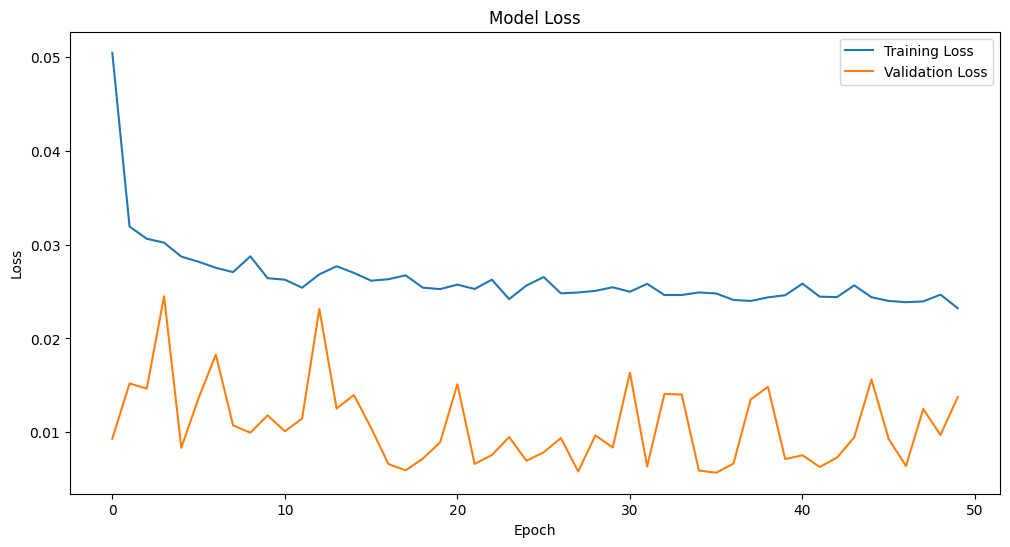

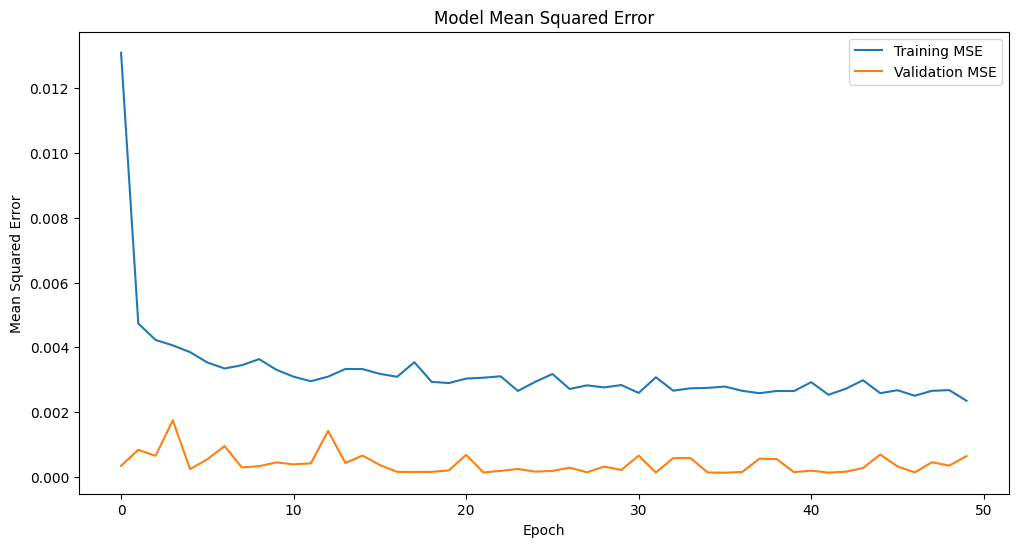

In [48]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(ADA_history.history['loss'], label='Training Loss')
plt.plot(ADA_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(ADA_history.history['mean_squared_error'], label='Training MSE')
plt.plot(ADA_history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()

In [49]:
# Evaluate the model
loss = model.evaluate(X_test_ADA, y_test_ADA)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_ADA)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 - mean_squared_error: 6.9564e-04 
Test Loss: [0.01547688152641058, 0.0007867773529142141]
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
ADA_new_data = ADA_features_scaled[-2].reshape(1, -1)

# Make a prediction
predicted_scaled = model.predict(ADA_new_data)

# Inverse transform the predicted value to get the original scale
predicted_original = ADA_target_scaler.inverse_transform(predicted_scaled)

print(f'Predicted next closing price: {predicted_original[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted next closing price: 54928.12109375


In [51]:
# Convert to sequences
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

# Define the sequence length (e.g., 60 days)
n_steps = 30

# Create sequences
X_ADA, y_ADA = create_sequences(ADA_features_scaled, ADA_target_scaled, n_steps)

# Train-test split
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(X_ADA, y_ADA, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train_ADA.shape}')
print(f'y_train shape: {y_train_ADA.shape}')
print(f'X_test shape: {X_test_ADA.shape}')
print(f'y_test shape: {y_test_ADA.shape}')

X_train shape: (4088, 30, 7)
y_train shape: (4088, 1)
X_test shape: (1022, 30, 7)
y_test shape: (1022, 1)


In [52]:
# Build the LSTM model
ADA_LSTM_model = Sequential()
ADA_LSTM_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_ADA.shape[1], X_train_ADA.shape[2])))
ADA_LSTM_model.add(Dropout(0.1))
ADA_LSTM_model.add(LSTM(units=64, return_sequences=True))
ADA_LSTM_model.add(Dropout(0.1))
ADA_LSTM_model.add(Dense(units=32, activation='relu'))
ADA_LSTM_model.add(Dense(units=1))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ADA_LSTM_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
ADA_LSTM_history = ADA_LSTM_model.fit(X_train_ADA, y_train_ADA, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


C:\Users\KMK\PycharmProjects\cbitwebsite\CryptoPrediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0408 - val_loss: 0.0056
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0020 - val_l

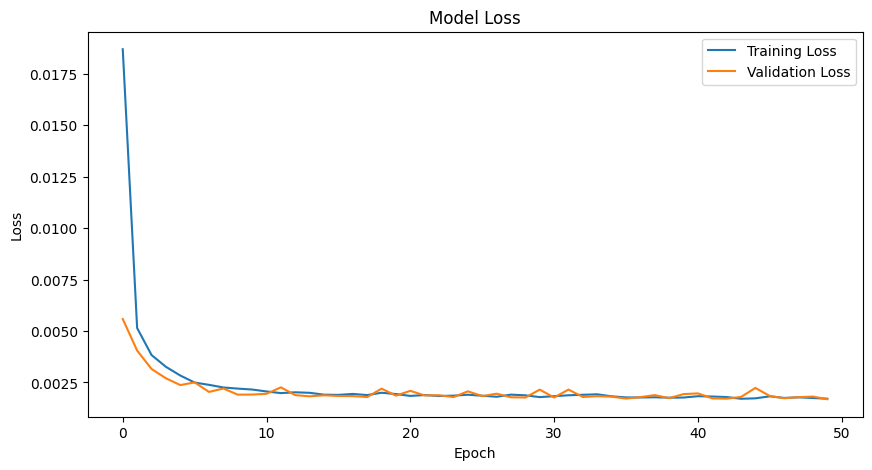

In [53]:
# Plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ADA_LSTM_history.history['loss'], label='Training Loss')
plt.plot(ADA_LSTM_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# Define the number of steps
n_steps = 30

# Calculate the end index
end_index = len(ADA_features_scaled) - 1  # Index of the row before the last row

# Calculate the start index to include `n_steps` rows
start_index = end_index - n_steps + 1  # Ensure this gives exactly `n_steps` rows

# Extract the sequence of `n_steps` rows
sequence = ADA_features_scaled[start_index:end_index + 1]  # end_index + 1 to include the row at end_index

# Check the shape of the sequence
print(f'Sequence shape: {sequence.shape}')

# Prepare the data point for the model
# Ensure the shape is (1, n_steps, number_of_features)
ADA_data_point = np.expand_dims(sequence, axis=0)
# Make the prediction
ADA_predicted_scaled = ADA_LSTM_model.predict(ADA_data_point)

# Reshape predicted_scaled to (1, 1) before inverse transforming
ADA_predicted_scaled_reshaped = ADA_predicted_scaled.reshape(-1, 1)

# Inverse transform the prediction to get the original scale
ADA_predicted = ADA_target_scaler.inverse_transform(ADA_predicted_scaled_reshaped)

print(f'Predicted closing price for the next day after the row before the last: {ADA_predicted[0][0]}')

Sequence shape: (30, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted closing price for the next day after the row before the last: 60469.75
